In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
!wget https://storage.googleapis.com/adsa-data/animal-classification/animal.zip
!unzip animal.zip -d temp

Streaming output truncated to the last 5000 lines.
  inflating: temp/train/dog.5499.jpg  
  inflating: temp/train/dog.55.jpg   
  inflating: temp/train/dog.550.jpg  
  inflating: temp/train/dog.5500.jpg  
  inflating: temp/train/dog.5501.jpg  
  inflating: temp/train/dog.5502.jpg  
  inflating: temp/train/dog.5503.jpg  
  inflating: temp/train/dog.5504.jpg  
  inflating: temp/train/dog.5505.jpg  
  inflating: temp/train/dog.5506.jpg  
  inflating: temp/train/dog.5507.jpg  
  inflating: temp/train/dog.5508.jpg  
  inflating: temp/train/dog.5509.jpg  
  inflating: temp/train/dog.551.jpg  
  inflating: temp/train/dog.5510.jpg  
  inflating: temp/train/dog.5511.jpg  
  inflating: temp/train/dog.5512.jpg  
  inflating: temp/train/dog.5513.jpg  
  inflating: temp/train/dog.5514.jpg  
  inflating: temp/train/dog.5515.jpg  
  inflating: temp/train/dog.5516.jpg  
  inflating: temp/train/dog.5517.jpg  
  inflating: temp/train/dog.5518.jpg  
  inflating: temp/train/dog.5519.jpg  
  inflating: tem

In [ ]:
!mkdir -p data/dog
!mkdir -p data/cat
!cp temp/train/dog.* data/dog/
!cp temp/train/cat.* data/cat/

In [ ]:
import os

dog_count = len(os.listdir("./data/dog"))
cat_count = len(os.listdir("./data/cat"))
print("Dog pictures: ", dog_count)
print("Cat pictures: ", cat_count)

Dog pictures:  12500
Cat pictures:  12500


Load the data

In [ ]:
IMAGE_WIDTH=170
IMAGE_HEIGHT=170
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
BATCH_SIZE=32

In [ ]:
# import PIL
# import PIL.Image
# import tensorflow as tf
# import tensorflow_datasets as tfds

# TODO Use tf.keras.utils.image_dataset_from_directory to assign 80% images to the train dataset
image_directory = 'data/'
full_dataset = tf.keras.utils.image_dataset_from_directory(
    image_directory,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,  # Your specified image size
    batch_size=BATCH_SIZE,  # Your specified batch size
    validation_split=0.2,  # 80% training, 20% validation
    subset="training",
    seed=1337,
)
train_ds = full_dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    image_directory,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,  # Your specified image size
    batch_size=BATCH_SIZE,  # Your specified batch size
    validation_split=0.2,
    subset="validation",
    seed=1337,
)


Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog']


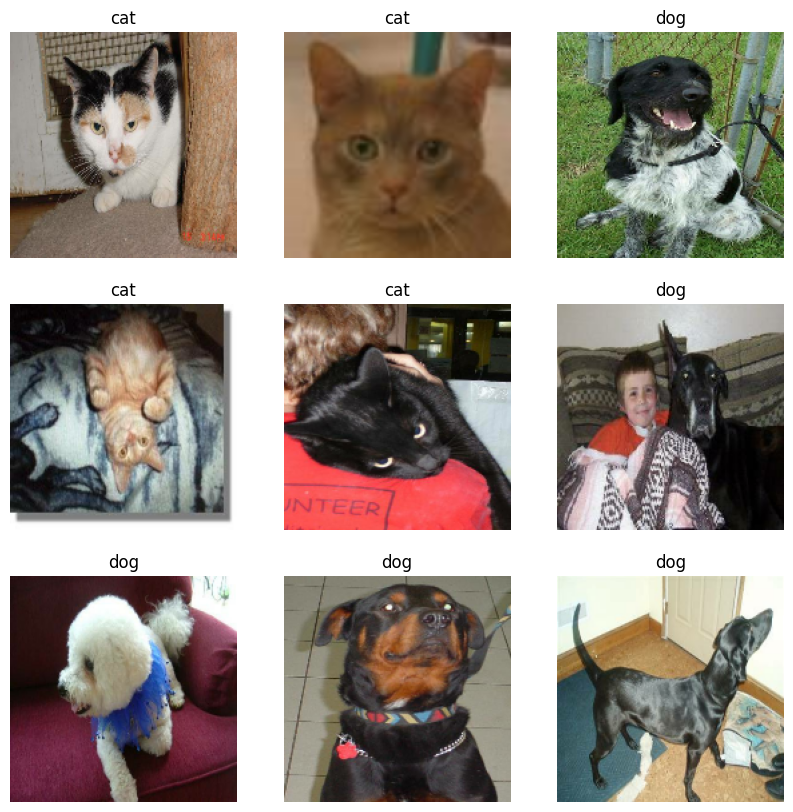

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [ ]:
from tensorflow import keras
# import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import layers, models
# TODO: Design an AlexNet models

def alexnet(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), input_shape=input_shape, activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


input_shape = (170, 170, 3)
num_classes = 1000

# Create AlexNet model
model = alexnet(input_shape, num_classes)

# Display the model summary
model.summary()


model.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 19, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 9, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 384)         1

In [ ]:
epochs = 10

train = model.fit(
    train_ds,
    epochs=epochs,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    callbacks=callbacks
)

Epoch 1/10
625/625 [==============================] - 46s 63ms/step - loss: 0.9193 - accuracy: 0.5120 - val_loss: 0.8855 - val_accuracy: 0.4952 - lr: 1.0000e-04
Epoch 2/10
625/625 [==============================] - 20s 32ms/step - loss: 0.6356 - accuracy: 0.6484 - val_loss: 0.5408 - val_accuracy: 0.7220 - lr: 1.0000e-04
Epoch 3/10
625/625 [==============================] - 20s 33ms/step - loss: 0.5272 - accuracy: 0.7437 - val_loss: 0.6121 - val_accuracy: 0.6496 - lr: 1.0000e-04
Epoch 4/10
625/625 [==============================] - 21s 34ms/step - loss: 0.4551 - accuracy: 0.7876 - val_loss: 0.4673 - val_accuracy: 0.7762 - lr: 1.0000e-04
Epoch 5/10
625/625 [==============================] - 20s 33ms/step - loss: 0.3977 - accuracy: 0.8196 - val_loss: 0.3936 - val_accuracy: 0.8216 - lr: 1.0000e-04
Epoch 6/10
625/625 [==============================] - 21s 33ms/step - loss: 0.3443 - accuracy: 0.8504 - val_loss: 0.3799 - val_accuracy: 0.8292 - lr: 1.0000e-04
Epoch 7/10
625/625 [==============

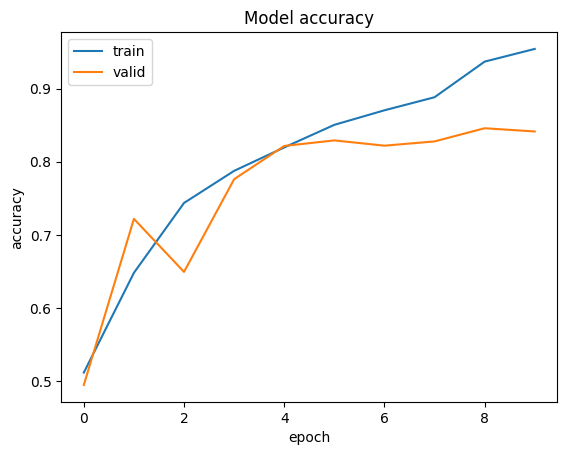

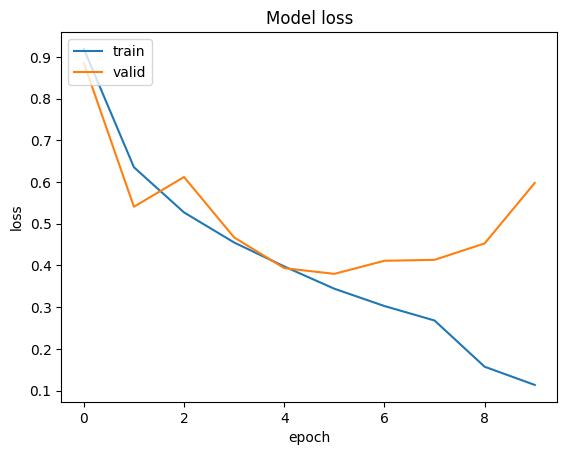

In [ ]:
# TODO: Plot loss and accuracy

def display_history(history):
    """Summarize history for accuracy and loss.
    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

display_history(train)


In [ ]:
!wget https://storage.googleapis.com/adsa-data/animal-classification/test.zip
!unzip test.zip

--2024-06-08 09:49:12--  https://storage.googleapis.com/adsa-data/animal-classification/test.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 370194 (362K) [application/zip]
Saving to: ‘test.zip.1’

test.zip.1          100%[===================>] 361.52K   563KB/s    in 0.6s    

2024-06-08 09:49:14 (563 KB/s) - ‘test.zip.1’ saved [370194/370194]

Archive:  test.zip
replace test/cat1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.figure(figsize=(10, 10))
for i, file in enumerate(glob.glob('test/*')):
    img = load_img(file, target_size=IMAGE_SIZE)

    # convert to array
    img = img_to_array(img)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(img.astype("uint8"))

    # reshape into a single sample with 3 channels
    img = img.reshape(1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)
    predict = model.predict(img)
    percent = predict[0][0]*100

    result = 'Cat'
    if percent < 50:
        result = 'Dog'
        percent = 100 - percent

    plt.title(result + ": " + str(round(percent, 2)) + "%")
    plt.axis("off")